<a href="https://colab.research.google.com/github/yih789/Data-Analysis-and-Image-Processing/blob/master/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 네이버 영화 리뷰 데이터 분석 2. 데이터 시각화
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/30.%20%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%E2%91%A1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94/%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%E2%91%A1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94.pdf)

**리뷰 정보 클래스 작성하기**

In [0]:
import urllib.request
from bs4 import BeautifulSoup

class Review:
  def __init__(self, comment, date, star, good, bad):
    self.comment = comment
    self.date = date
    self.star = star
    self.good = good
    self.bad = bad

  def show(self):
    print("내용: " + self.comment +
          "\n날짜: " + self.date +
          "\n별점: " + self.star +
          "\n좋아요: " + self.good +
          "\n싫어요: " + self.bad)

**리뷰 정보 크롤링 함수**

In [0]:
def crawl(url):
  soup = BeautifulSoup(urllib.request.urlopen(url).read(), "html.parser")
  review_list = []
  title = soup.find('h3', class_='h_movie').find('a').text
  div = soup.find("div", class_="score_result")
  data_list = div.select("ul > li")
  
  for review in data_list:
    star = review.find("div", class_="star_score").text.strip()
    reply = review.find("div", class_="score_reple")
    comment = reply.find("p").text.strip()
    date = reply.select("dt > em")[1].text.strip()
    button = review.find("div", class_="btn_area")
    sympathy = button.select("strong")
    good = sympathy[0].text
    bad = sympathy[1].text
    review_list.append(Review(comment, date, star, good, bad))

  return title, review_list

**데이터 프레임화**

In [0]:
import pandas as pd

def get_summary(review_list):
  star_list = []
  good_list = []
  bad_list = []
  
  for review in review_list:
    star_list.append(int(review.star))
    good_list.append(int(review.good))
    bad_list.append(int(review.bad))
    
  star_series = pd.Series(star_list)
  good_series = pd.Series(good_list)
  bad_series = pd.Series(bad_list)
  
  summary = pd.DataFrame({
      'Star': star_series,
      'Good': good_series,
      'Bad': bad_series,
      'Score': good_series / (good_series + bad_series)
  })
  
  return summary

**다수의 영화 데이터 시각화 ①**

In [0]:
movie_code_list = [136900, 167657, 174321, 184859, 167391]
review_lists = []

for i in movie_code_list:
  title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
  summary = get_summary(review_list)
  print("[ %s ]" % (title))
  print(summary)
  review_lists.append((title, review_list))

[ 어벤져스: 엔드게임 ]
   Star   Good  Bad     Score
0    10  22861  645  0.972560
1    10  15088  427  0.972478
2    10  14681  455  0.969939
3    10  12667  525  0.960203
4    10  11403  412  0.965129
[ 명탐정 피카츄 ]
   Star  Good  Bad     Score
0    10  1901  104  0.948130
1    10   958   84  0.919386
2    10   812   71  0.919592
3     8   932  283  0.767078
4     8   600   39  0.938967
[ 고양이 여행 리포트 ]
   Star  Good  Bad     Score
0    10    64    5  0.927536
1    10    38    3  0.926829
2     6    43   19  0.693548
3    10    25    2  0.925926
4    10    27    4  0.870968
[ 물의 기억 ]
   Star  Good  Bad     Score
0    10    28   10  0.736842
1    10    26   10  0.722222
2    10    23    9  0.718750
3    10    14    2  0.875000
4    10    18    6  0.750000
[ 더 캡틴 ]
   Star  Good  Bad     Score
0     9    76   11  0.873563
1    10    40    4  0.909091
2    10    40    7  0.851064
3     8    33    5  0.868421
4     8    24    0  1.000000


**다수의 영화 데이터 시각화 ②**

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

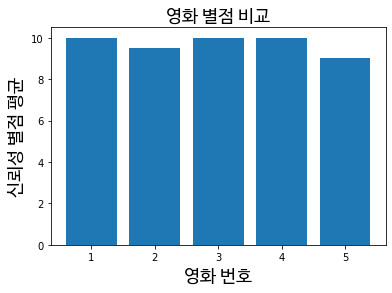

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def movie_compare(review_lists):
  count = 1
  x = []
  y = []
  for movie, review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    summary = summary[summary['Score'] > 0.8]
    y.append(summary['Star'].mean())
    count += 1
  plt.bar(x, y)
  plt.title('영화 별점 비교', fontproperties=fontprop)
  plt.xlabel('영화 번호', fontproperties=fontprop)
  plt.ylabel('신뢰성 별점 평균', fontproperties=fontprop)
  plt.show()
  
movie_compare(review_lists)